In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
customers = pd.read_csv("/content/drive/MyDrive/Data Science/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Data Science/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Data Science/Transactions.csv")

In [3]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [4]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [5]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [6]:
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price_x': 'mean',
    'ProductID': lambda x: ' '.join(map(str, x))
}).reset_index()

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_features.iloc[:, 1:-2])

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [9]:
customer_features['Cluster'] = clusters

In [12]:
print(f"Number of Clusters Formed: {kmeans.n_clusters}")

Number of Clusters Formed: 5


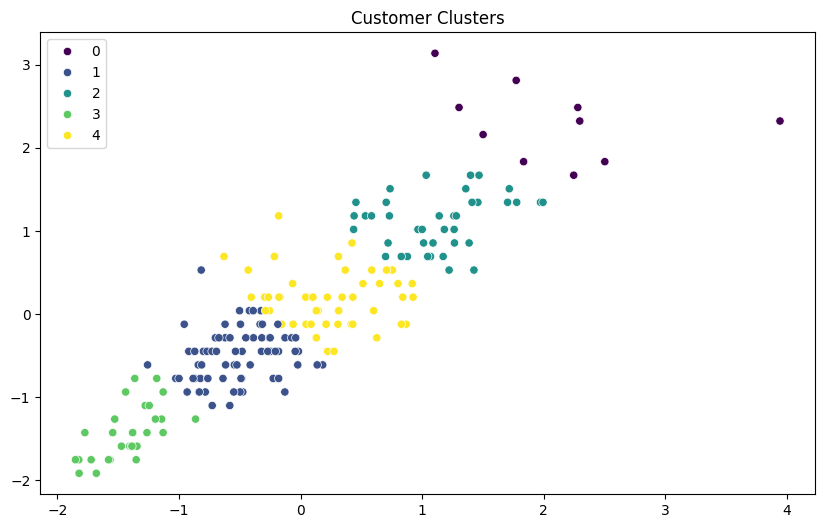

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters, palette='viridis')
plt.title("Customer Clusters")
plt.show()

In [11]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(scaled_data, clusters)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.776661054409607


In [13]:
from sklearn.metrics import mean_squared_error, silhouette_score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.3968
